# **LOADING** **DATASET**

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Merged_File.csv')

# **DATA PREPROCESSING**

## 1.Exploratory Data Analysis



In [210]:
print(dataset.info())
print()
print(dataset.describe())
print()
print(dataset.isnull().sum())
print()
print(dataset.duplicated().sum())
print()
print(dataset.head())
print()
#No duplicates or null values to remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   CustomerID         1000 non-null   int64  
 2   AccountBalance     1000 non-null   float64
 3   LastLogin          1000 non-null   object 
 4   Name               1000 non-null   object 
 5   Age                1000 non-null   int64  
 6   Address            1000 non-null   object 
 7   SuspiciousFlag     1000 non-null   int64  
 8   TransactionID      1000 non-null   int64  
 9   Amount             1000 non-null   float64
 10  AnomalyScore       1000 non-null   float64
 11  TransactionAmount  1000 non-null   float64
 12  FraudIndicator     1000 non-null   int64  
 13  Category           1000 non-null   object 
 14  Timestamp          1000 non-null   object 
 15  MerchantID         1000 non-null   int64  
 16  MerchantName       1000 n

## 2.Handling Outliers



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   CustomerID         1000 non-null   int64  
 2   AccountBalance     1000 non-null   float64
 3   LastLogin          1000 non-null   object 
 4   Name               1000 non-null   object 
 5   Age                1000 non-null   int64  
 6   Address            1000 non-null   object 
 7   SuspiciousFlag     1000 non-null   int64  
 8   TransactionID      1000 non-null   int64  
 9   Amount             1000 non-null   float64
 10  AnomalyScore       1000 non-null   float64
 11  TransactionAmount  1000 non-null   float64
 12  FraudIndicator     1000 non-null   int64  
 13  Category           1000 non-null   object 
 14  Timestamp          1000 non-null   object 
 15  MerchantID         1000 non-null   int64  
 16  MerchantName       1000 n

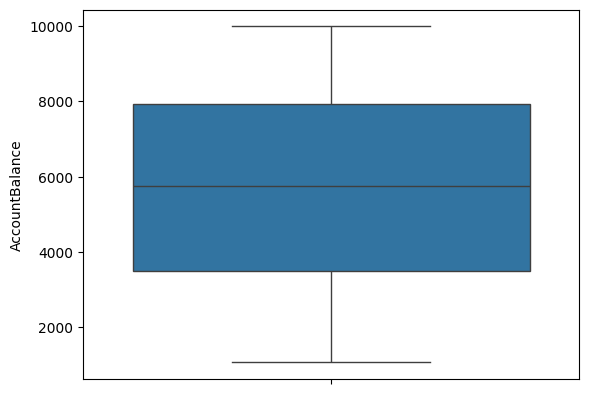

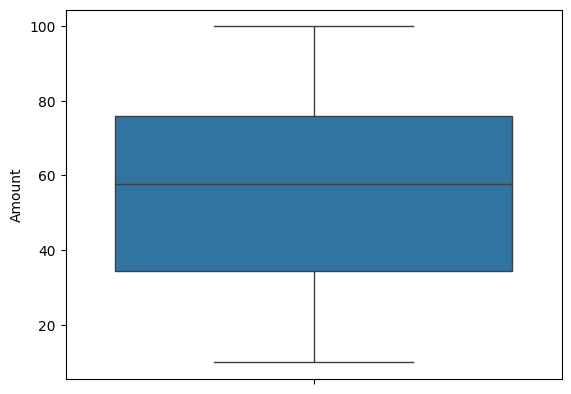

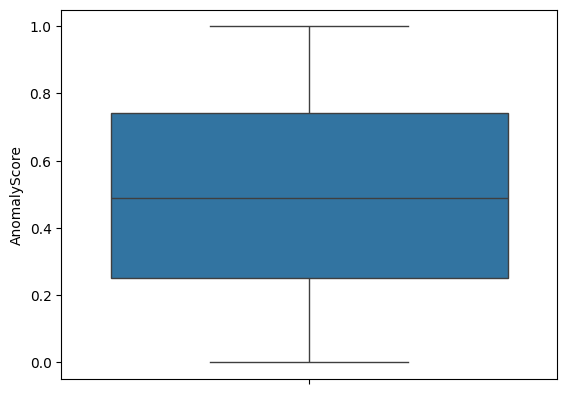

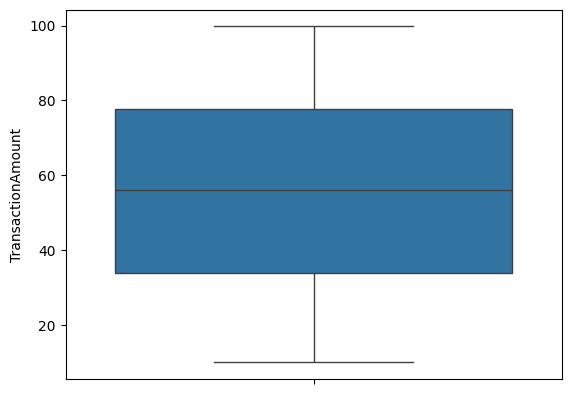

In [211]:
print(dataset.info())
dataset.drop("Unnamed: 0",axis = 1,inplace = True)
print(dataset.info())
sns.boxplot(y = "AccountBalance",data = dataset)
plt.show()
sns.boxplot(y = "Amount",data = dataset)
plt.show()
sns.boxplot(y = "AnomalyScore",data = dataset)
plt.show()
sns.boxplot(y = "TransactionAmount",data = dataset)
plt.show()
#No outliers

## 3.Dropping Columns

In [212]:
dataset.drop(["TransactionID" , "CustomerID", "MerchantID","Name","Location","MerchantName","Address"],axis = 1,inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AccountBalance     1000 non-null   float64
 1   LastLogin          1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   SuspiciousFlag     1000 non-null   int64  
 4   Amount             1000 non-null   float64
 5   AnomalyScore       1000 non-null   float64
 6   TransactionAmount  1000 non-null   float64
 7   FraudIndicator     1000 non-null   int64  
 8   Category           1000 non-null   object 
 9   Timestamp          1000 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 78.2+ KB


# **ADDRESS CLASS IMBALANCE**



### 1.Check for Imbalance in Dataset

In [213]:
dataset["FraudIndicator"].value_counts()
#High Imbalance in dataset, only 4.5% cases are frauds

,count
FraudIndicator,
0,955
1,45




## 2.Finding out the discrepancies in data



In [214]:
legit = dataset[dataset.FraudIndicator == 0]
fraud = dataset[dataset.FraudIndicator == 1]

In [215]:
legit.describe()

,AccountBalance,Age,SuspiciousFlag,Amount,AnomalyScore,TransactionAmount,FraudIndicator
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.0
mean,5717.875984,39.908901,0.023037,55.315317,0.495298,56.043235,0.0
std,2544.038509,13.058451,0.150098,25.000374,0.287489,26.143409,0.0
min,1069.843868,18.000000,0.000000,10.006933,0.000234,10.057864,0.0
25%,3454.648531,29.000000,0.000000,34.343356,0.257657,33.881084,0.0
50%,5765.640647,39.000000,0.000000,57.456224,0.492191,56.253886,0.0
75%,7923.417551,51.000000,0.000000,75.867802,0.744149,77.805093,0.0
max,9999.776239,64.000000,1.000000,99.887410,0.999047,99.784323,0.0


In [216]:
fraud.describe()

,AccountBalance,Age,SuspiciousFlag,Amount,AnomalyScore,TransactionAmount,FraudIndicator
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,5664.097017,38.555556,0.066667,57.083189,0.428274,51.834135,1.0
std,2491.966986,13.505143,0.252262,26.762756,0.303903,24.952759,0.0
min,1056.301181,18.000000,0.000000,10.863845,0.006120,10.831047,1.0
25%,3760.161480,27.000000,0.000000,37.182412,0.161773,30.823268,1.0
50%,5628.777106,36.000000,0.000000,58.881829,0.354091,51.138916,1.0
75%,8044.236478,48.000000,0.000000,72.132584,0.646371,75.659944,1.0
max,9674.062164,63.000000,1.000000,99.243294,0.966456,93.909801,1.0


In [217]:
numeric_features = dataset.select_dtypes(include=np.number).columns
dataset_numeric = dataset[numeric_features]
result = dataset_numeric.groupby("FraudIndicator").mean()
print(result)

                AccountBalance        Age  SuspiciousFlag     Amount  \
FraudIndicator                                                         
0                  5717.875984  39.908901        0.023037  55.315317   
1                  5664.097017  38.555556        0.066667  57.083189   

                AnomalyScore  TransactionAmount  
FraudIndicator                                   
0                   0.495298          56.043235  
1                   0.428274          51.834135  


## 3.Under Sampling



In [218]:
legit_sample = legit.sample(n = 155)

In [219]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [220]:
new_dataset.head()

,AccountBalance,LastLogin,Age,SuspiciousFlag,Amount,AnomalyScore,TransactionAmount,FraudIndicator,Category,Timestamp
32,3767.557888,2022-01-30,54,0,59.350990,0.790492,16.316389,0,Other,2022-01-02 08:00:00
596,1150.295949,2023-08-18,53,0,68.161513,0.106593,39.025706,0,Retail,2022-01-26 17:00:00
139,5038.910017,2022-05-18,63,0,61.193746,0.429079,75.353721,0,Other,2022-02-09 16:00:00
9,2706.148888,2022-01-12,45,0,61.658995,0.264580,97.486882,0,Online,2022-01-05 05:00:00
155,3214.341695,2022-05-28,63,0,70.344273,0.205206,97.632391,0,Other,2022-01-31 20:00:00


In [221]:
new_dataset.tail()

,AccountBalance,LastLogin,Age,SuspiciousFlag,Amount,AnomalyScore,TransactionAmount,FraudIndicator,Category,Timestamp
934,2462.046546,2024-08-01,51,0,58.179737,0.044342,30.823268,1,Travel,2022-01-12 07:00:00
940,2394.859954,2024-08-07,48,0,50.235850,0.175378,11.829615,1,Other,2022-02-03 01:00:00
966,2417.248389,2024-09-02,54,0,16.266611,0.694634,34.856593,1,Travel,2022-01-31 13:00:00
984,4053.590461,2024-09-18,55,0,21.007402,0.204989,21.473753,1,Online,2022-02-07 19:00:00
989,2240.517799,2024-09-21,38,0,72.132584,0.939216,29.679255,1,Travel,2022-01-10 10:00:00


In [222]:
new_dataset["FraudIndicator"].value_counts()

,count
FraudIndicator,
0,155
1,45


In [223]:
new_dataset['LastLogin'] = pd.to_datetime(new_dataset['LastLogin'], errors='coerce')
new_dataset['Timestamp'] = pd.to_datetime(new_dataset['Timestamp'], errors='coerce')
numeric_features = new_dataset.select_dtypes(include=np.number).columns
result1 = new_dataset[numeric_features].groupby("FraudIndicator").mean()
print(result1)

                AccountBalance        Age  SuspiciousFlag     Amount  \
FraudIndicator                                                         
0                  5762.977019  39.683871        0.019355  54.877309   
1                  5664.097017  38.555556        0.066667  57.083189   

                AnomalyScore  TransactionAmount  
FraudIndicator                                   
0                   0.504045          55.303034  
1                   0.428274          51.834135  


In [224]:
for col in ["LastLogin", "Timestamp"]:
    if col in new_dataset.columns:
        new_dataset[col] = pd.to_datetime(new_dataset[col], errors='coerce')
        new_dataset[col + "_year"] = new_dataset[col].dt.year
        new_dataset[col + "_month"] = new_dataset[col].dt.month
        new_dataset[col + "_day"] = new_dataset[col].dt.day
        new_dataset[col + "_hour"] = new_dataset[col].dt.hour
        new_dataset = new_dataset.drop(columns=[col])

In [225]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [7])], remainder = "passthrough")
new_dataset.info()
print(new_dataset.head())
x = new_dataset.iloc[:,:].values
x = np.array(ct.fit_transform(x))
new_dataset = pd.DataFrame(x)
print(new_dataset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 32 to 989
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AccountBalance     200 non-null    float64
 1   Age                200 non-null    int64  
 2   SuspiciousFlag     200 non-null    int64  
 3   Amount             200 non-null    float64
 4   AnomalyScore       200 non-null    float64
 5   TransactionAmount  200 non-null    float64
 6   FraudIndicator     200 non-null    int64  
 7   Category           200 non-null    object 
 8   LastLogin_year     200 non-null    int32  
 9   LastLogin_month    200 non-null    int32  
 10  LastLogin_day      200 non-null    int32  
 11  LastLogin_hour     200 non-null    int32  
 12  Timestamp_year     200 non-null    int32  
 13  Timestamp_month    200 non-null    int32  
 14  Timestamp_day      200 non-null    int32  
 15  Timestamp_hour     200 non-null    int32  
dtypes: float64(4), int32(8), int64

In [226]:
new_dataset[11] = pd.to_numeric(new_dataset[11])



# Splitting of Dataset for Training and Testing



In [227]:
from sklearn.model_selection import train_test_split
y = new_dataset.iloc[:,11].values
x = new_dataset.drop(11, axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2, stratify = y)

In [228]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(200, 19) (160, 19) (40, 19)
(200,) (160,) (40,)


# **IMPLEMENTING CLASSIFICATION ALGORITHMS**

## 1.Logistic Regression



### Model Training

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation

In [230]:
from sklearn.metrics import confusion_matrix,accuracy_score
training_data_accuracy = accuracy_score(y_train,y_train_pred)
test_data_accuracy = accuracy_score(y_test,y_test_pred)
print(training_data_accuracy)
print(test_data_accuracy)

0.55625
0.475


## 2.Random Forest




### Model Training

In [231]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

### Evaluation

In [232]:
from sklearn.metrics import confusion_matrix,accuracy_score
training_data_accuracy = accuracy_score(y_train,y_train_pred)
test_data_accuracy = accuracy_score(y_test,y_test_pred)
print(training_data_accuracy)
print(test_data_accuracy)

0.98125
0.75


## 3.XGboost

### Model Training and Evaluation

In [233]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def cross_val(classifier, num_splits=10):
    x_numeric = x.apply(pd.to_numeric, errors='coerce')
    scores = cross_val_score(classifier, x_numeric, y, cv=num_splits)
    print(np.round(scores, 2))
    print(np.mean(scores))

cross_val(XGBClassifier(n_estimators=5, random_state=2))

[0.8  0.85 0.75 0.8  0.75 0.7  0.65 0.6  0.7  0.7 ]
0.7300000000000001


## 4.LightGBM

### Model Training

In [234]:
import lightgbm as lgb

train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)
parameters = {
    'is_unbalance': 'true',
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 63,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.01,
    'verbose': -1
}
model = lgb.train(parameters, train_data, valid_sets=test_data, num_boost_round=5000, callbacks=[lgb.early_stopping(stopping_rounds=50)])
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.603943


### Evaluation

In [235]:
from sklearn.metrics import roc_auc_score
training_data_accuracy = roc_auc_score(y_train,y_train_pred)
test_data_accuracy = roc_auc_score(y_test,y_test_pred)
print(training_data_accuracy)
print(test_data_accuracy)

0.7445116487455198
0.6039426523297491


## 5.Support Vector Machine

### Model Training

In [236]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear',gamma = 'auto', C = 2)
classifier.fit(x_train,y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

### Evaluation

In [237]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

training_data_accuracy = accuracy_score(y_train,y_train_pred)
test_data_accuracy = accuracy_score(y_test,y_test_pred)
print(training_data_accuracy)
print(test_data_accuracy)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

0.78125
0.75
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.33      0.11      0.17         9

    accuracy                           0.75        40
   macro avg       0.56      0.52      0.51        40
weighted avg       0.68      0.75      0.70        40

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       124
           1       0.67      0.06      0.10        36

    accuracy                           0.78       160
   macro avg       0.73      0.52      0.49       160
weighted avg       0.76      0.78      0.70       160



## 6.Neural Network

### Model Training

epoch:  0  loss: 0.61817533
epoch: 100  loss: 0.06501384
epoch: 200  loss: 0.02641175
epoch: 300  loss: 0.02459395
epoch: 400  loss: 0.02323138
epoch: 500  loss: 0.02134362
epoch: 600  loss: 0.01894948
epoch: 700  loss: 0.01630829
epoch: 800  loss: 0.01589823
epoch: 900  loss: 0.01577277


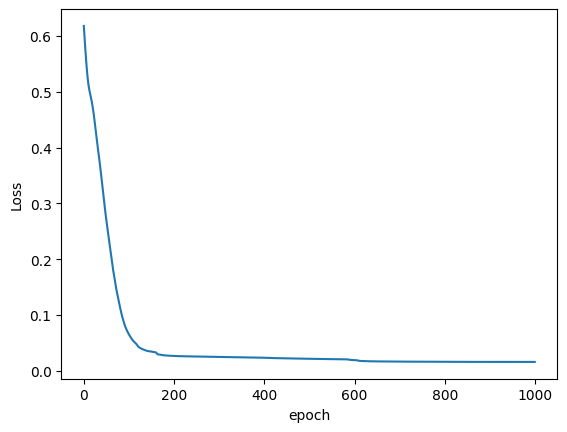

In [248]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class Model(nn.Module):
  def __init__(self, in_features=19, h1=8, h2=9, out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

torch.manual_seed(2)
model = Model()

x_train1 = torch.tensor(x_train.astype(np.float32), dtype=torch.float32)
x_test1 = torch.tensor(x_test.astype(np.float32), dtype=torch.float32)
y_train1 = torch.LongTensor(y_train)
y_test1 = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
epochs = 1000
losses = []
for i in range(epochs):
  y_train_pred = model.forward(x_train1)
  loss = criterion(y_train_pred, y_train1)
  losses.append(loss.detach().numpy())
  if i%100 ==0:
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation

In [249]:
with torch.no_grad():
  y_eval = model.forward(x_test1)
  loss = criterion(y_eval, y_test1)
print(loss)

tensor(7.0583)


In [250]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test1):
    y_val = model.forward(data)
    print(f'{i+1}.){str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(correct)
print(f'Accuracy: {round(correct/len(y_test),3)}')

1.)tensor([ 13.0983, -11.9018]) 	 0
2.)tensor([ 21.7227, -20.4557]) 	 1
3.)tensor([ 1.8906, -2.0491]) 	 1
4.)tensor([ 16.0731, -15.6407]) 	 1
5.)tensor([-0.4720,  0.2916]) 	 0
6.)tensor([ 2.9302, -2.5179]) 	 1
7.)tensor([ 0.5663, -0.5586]) 	 0
8.)tensor([ 10.5974, -10.6530]) 	 1
9.)tensor([ 10.9620, -10.6013]) 	 0
10.)tensor([-7.4255,  6.0526]) 	 0
11.)tensor([ 2.4048, -2.2630]) 	 0
12.)tensor([ 9.9930, -9.9430]) 	 0
13.)tensor([ 12.0919, -11.3392]) 	 1
14.)tensor([-5.4757,  5.6927]) 	 1
15.)tensor([ 20.6376, -20.2326]) 	 0
16.)tensor([ 12.4305, -11.6068]) 	 0
17.)tensor([ 11.5186, -10.4268]) 	 0
18.)tensor([ 6.4606, -6.1278]) 	 0
19.)tensor([ 6.6295, -6.4111]) 	 0
20.)tensor([ 7.7616, -8.5083]) 	 0
21.)tensor([-19.2146,  19.0742]) 	 0
22.)tensor([ 12.4723, -11.5260]) 	 0
23.)tensor([-7.7258,  7.1622]) 	 1
24.)tensor([ 0.1367, -0.2955]) 	 0
25.)tensor([-29.4846,  29.1256]) 	 0
26.)tensor([-0.6183,  0.7501]) 	 0
27.)tensor([ 10.5276, -10.9880]) 	 0
28.)tensor([ 0.9067, -0.4193]) 	 0
29.